### Importer les librairies requises

In [2]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import et lire les données

In [3]:
# Importer les données Wholesale_customers_Data
data = pd.read_csv("Wholesale_customers_data.csv")

In [4]:
# Afficher les 10 dernières lignes des données
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
# Afficher la dimension des données
data.shape

(440, 6)

In [6]:
# Vérifier les types des données
data.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
# Vérifier l'existence de valeurs manquantes
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
# Décrire les données 
data.describe

<bound method NDFrame.describe of      Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]>

### Normaliser les données

In [25]:
# Transformer le dataframe des données en format matriciel
 
X = data.iloc[:,:6].values
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [35]:
from sklearn.preprocessing import normalize
# Normaliser X en utilisant la fonction normalize
Z =  normalize(X)
# Afficher les cinq premières lignes de la matrice des données normalisées
Z[:5]


array([[0.70833271, 0.53987376, 0.42274083, 0.01196489, 0.14950522,
        0.07480852],
       [0.44219826, 0.61470384, 0.59953989, 0.11040858, 0.20634248,
        0.11128583],
       [0.39655169, 0.5497918 , 0.47963217, 0.15011913, 0.2194673 ,
        0.48961931],
       [0.85683654, 0.07725417, 0.27265036, 0.41365859, 0.03274905,
        0.11549369],
       [0.89541593, 0.21420297, 0.28499685, 0.1550101 , 0.07035835,
        0.20529434]])

### ACP en utilisant le modèle PCA de sklearn

In [39]:
# Importer le modèle PCA
from sklearn.decomposition import PCA
# Initier l'instance PCA avec 3 composantes
pca = PCA(n_components=3)
# Entrainer le modèle en utilisant la fonction fit sur les données normalisées
pca.fit(Z)
# Récupérer la matrice des 3 composantes en utilisant la fonction fit_transform sur les données normalisées
features_pca =pca.fit_transform(Z)

In [41]:
# Créer une variable des noms des 3 composantes
Columns = ['F'+str(i) for i in range(1,4)]
# Créer le nouveau dataframe composé  des 3 composantes 
New_df = pd.DataFrame(features_pca,columns=Columns)
# Afficher les 5 premières de New_df
New_df.head()

,F1,F2,F3
0,0.034037,-0.180421,0.229754
1,0.351057,-0.046644,0.180286
2,0.305375,0.055551,0.221512
3,-0.383677,0.161789,-0.137268
4,-0.318591,-0.076970,0.031286


In [42]:
# Afficher la part des 3 composantes principales et arrondir la valeur à deux éléments après la virgule 
np.round(sum(pca.explained_variance_ratio_   )*100, 2)

92.43

# Kmeans

In [43]:
# Importer le modèle KMeans
from sklearn.cluster import KMeans

##### La méthode elbow (coude)

In [44]:
# Rechercher le nombre de classe k optimal 
inertie_intra = [] # liste des inerties intra 
for k in range(1, 11):
    # Entrainer Kmeans
    kmeans = KMeans(n_clusters=k,init = "random", max_iter = 500)
    kmeans.fit(Z)
    # Ajouter l'inertie intra dans la liste inertie_intra
    inertie_intra.append(kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


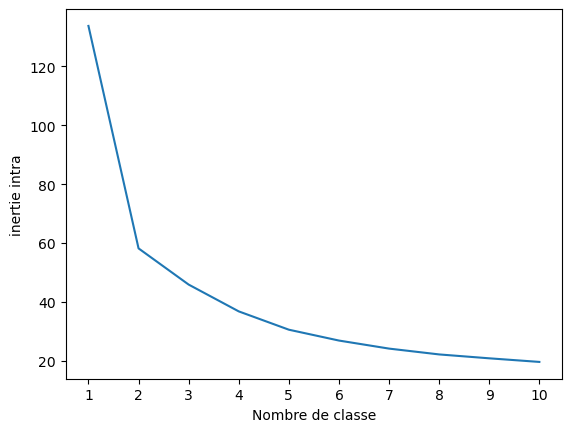

In [45]:
# Methode elbow
plt.plot(range(1, 11), inertie_intra)
plt.xticks(range(1, 11))
plt.xlabel("Nombre de classe")
plt.ylabel("inertie intra")
plt.show()

#### Appliquer Kmeans

In [46]:
# Instantier le modèle  Kmeans avec 2 classes, le paramètre init égal random et maximum itérations 500 
kmeans_model = KMeans(n_clusters=k,init = "random", max_iter = 500)
# Entrainer le modèle en utilisant la fonction fit sur la matrice des données normalisées
kmeans_model.fit(Z)

KMeans(init='random', max_iter=500, n_clusters=10)

#### Prédiction

In [48]:
# Prediction la partition des données en utilisant la fonction fit_predict sur les données normalisées
Pred = kmeans_model.fit_predict(Z)
# Afficher la partition des données
Pred

array([7, 2, 9, 1, 6, 9, 6, 7, 7, 2, 8, 4, 6, 7, 6, 6, 2, 9, 6, 7, 6, 1,
       4, 9, 6, 6, 4, 4, 2, 4, 6, 9, 4, 4, 2, 8, 4, 7, 2, 4, 1, 6, 7, 8,
       7, 2, 2, 2, 7, 2, 1, 2, 4, 2, 4, 7, 2, 2, 4, 7, 7, 2, 7, 2, 1, 8,
       8, 7, 9, 6, 1, 7, 3, 1, 7, 4, 3, 2, 4, 2, 6, 8, 7, 4, 6, 8, 0, 4,
       3, 4, 4, 1, 2, 3, 2, 5, 8, 3, 3, 1, 7, 8, 2, 4, 4, 4, 8, 2, 0, 5,
       4, 7, 1, 4, 4, 4, 6, 7, 4, 1, 4, 9, 4, 7, 4, 4, 1, 6, 0, 4, 1, 4,
       4, 4, 6, 6, 0, 0, 6, 9, 6, 6, 4, 1, 4, 7, 6, 6, 1, 4, 4, 9, 4, 0,
       4, 8, 8, 4, 2, 8, 8, 4, 4, 8, 2, 7, 2, 7, 4, 1, 8, 0, 2, 8, 5, 2,
       4, 6, 6, 9, 7, 4, 8, 9, 5, 9, 3, 2, 2, 2, 1, 4, 6, 8, 6, 1, 1, 2,
       6, 4, 8, 8, 6, 8, 5, 8, 4, 2, 2, 2, 4, 2, 4, 2, 8, 2, 8, 4, 8, 1,
       4, 2, 3, 3, 4, 6, 6, 1, 7, 1, 1, 0, 4, 0, 4, 0, 4, 4, 4, 4, 1, 4,
       4, 6, 2, 8, 4, 4, 6, 1, 9, 2, 3, 6, 9, 4, 6, 1, 4, 4, 6, 1, 4, 5,
       8, 0, 5, 4, 7, 4, 3, 9, 0, 4, 2, 9, 4, 3, 1, 6, 9, 6, 4, 1, 4, 4,
       6, 1, 4, 4, 7, 6, 3, 2, 4, 7, 4, 7, 7, 5, 6,

#### Le nombre d'individus dans classe 

In [51]:
# Afficher le nombre d'individus dans chaque classe
pd.Series(Pred).value_counts()

4    109
6     59
2     54
1     50
8     44
7     41
3     24
0     23
9     22
5     14
dtype: int64

#### Visualiser les classes prédictes par Kmeans

Text(0, 0.5, 'F2')

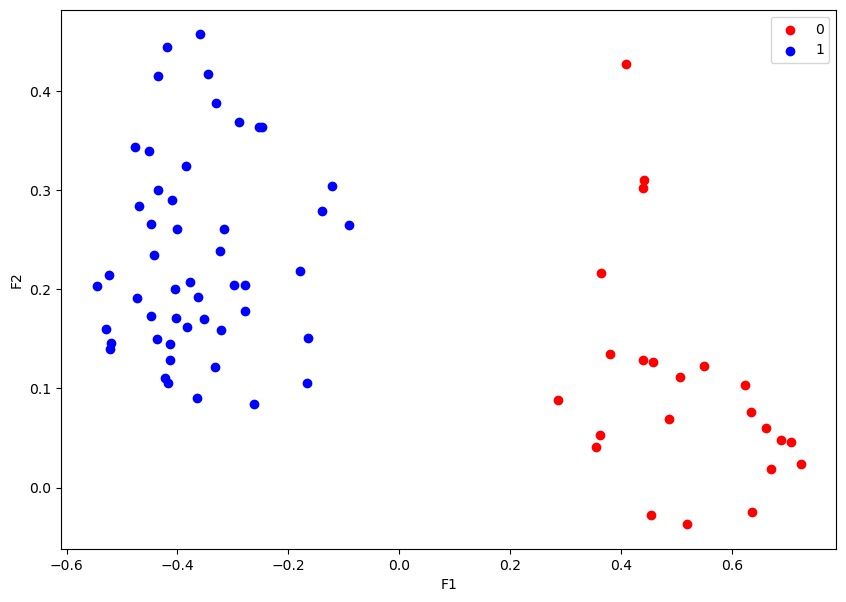

In [58]:
# Visualiser les classes suivant les deux premiers composantes ( F1 et F2 ) du dataframe New_df
plt.figure(figsize=(10, 7))  
plt.scatter( New_df .F1[Pred==0] , New_df.F2[Pred==0] , c='r', label = '0') 
plt.scatter( New_df .F1[Pred==1], New_df.F2[Pred==1] , c='b', label = '1')
plt.legend()
plt.xlabel('F1')
plt.ylabel('F2')

Indice de silhouette value de la partition du Kmeans

In [59]:
from sklearn.metrics import silhouette_score
# Afficher l'indice de Silhouette value de la partition retournée par Kmeans
silhouette_score(Z, Pred)

0.29931345095364736